### WHITE-WINE QUALITY PREDICTION
IMPORTING OF LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPPORTING OF DATA TABLE

In [2]:
df = pd.read_csv('winequality_white.csv')

In [3]:
df.shape

(4898, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.duplicated().sum()

937

In [6]:
df = df.drop_duplicates()

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3961.0,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile acidity,3961.0,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric acid,3961.0,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual sugar,3961.0,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,3961.0,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free sulfur dioxide,3961.0,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total sulfur dioxide,3961.0,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,3961.0,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3961.0,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,3961.0,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


DEFINING OF FEATURE & VARIABLES

In [9]:
X = df.drop(columns='quality')
y = df['quality']

In [10]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [11]:
y

0       6
1       6
2       6
3       6
6       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 3961, dtype: int64

In [12]:
df['quality'].value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

SAMPLING

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
X.shape, X_train.shape, X_test.shape,y.shape,y_train.shape,y_test.shape

((3961, 11), (3168, 11), (793, 11), (3961,), (3168,), (793,))

FITTING OF MODEL

In [18]:
model = SVC(random_state=42)
model.fit(X_train,y_train)

SVC(random_state=42)

ACCURACY SCORE [TRAIN]

In [19]:
# accuracy on training data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print(training_data_accuracy)

0.45233585858585856


In [20]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  45.23 %


CONFUSION MATRIX [TRAIN]

In [1]:
cf_matrix = confusion_matrix(y_train,y_train_prediction)

print(cf_matrix)

NameError: name 'confusion_matrix' is not defined

<Axes: >

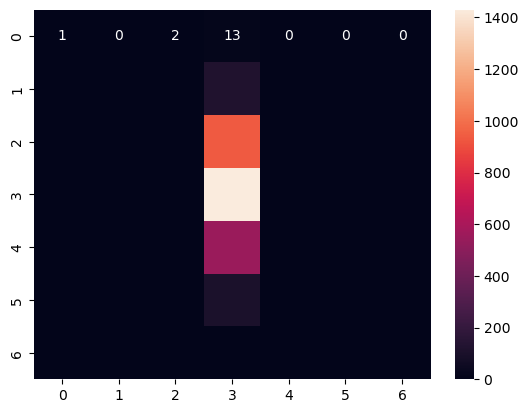

In [23]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

ACCURACY SCORE & CONFUSION MATRIX [TEST]

In [24]:
# accuracy on training data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print(test_data_accuracy)

0.4527112232030265


In [25]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  45.27 %


In [26]:
cf_matrix = confusion_matrix(y_test,y_test_prediction)

print(cf_matrix)

[[  0   0   0   4   0   0   0]
 [  0   0   0  31   0   0   0]
 [  0   0   1 234   0   0   0]
 [  0   0   0 358   0   0   0]
 [  0   0   0 138   0   0   0]
 [  0   0   0  26   0   0   0]
 [  0   0   0   1   0   0   0]]


CLASSIFICATION EPORT [TRAIN]

In [27]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           3       1.00      0.06      0.12        16
           4       0.00      0.00      0.00       122
           5       0.40      0.00      0.00       940
           6       0.45      1.00      0.62      1430
           7       0.00      0.00      0.00       551
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00         4

    accuracy                           0.45      3168
   macro avg       0.26      0.15      0.11      3168
weighted avg       0.33      0.45      0.28      3168



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CLASSIFICATION REPORT [TEST]

In [28]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        31
           5       1.00      0.00      0.01       235
           6       0.45      1.00      0.62       358
           7       0.00      0.00      0.00       138
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00         1

    accuracy                           0.45       793
   macro avg       0.21      0.14      0.09       793
weighted avg       0.50      0.45      0.28       793



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above study it is found that qulity 6 if the most prefered one

************************************************************DONE**********************************************************